In [1]:
from IPython.display import clear_output
import random

In [2]:
%run sim_network.ipynb
%run berkeley.ipynb
%run util.ipynb
%run show_plt.ipynb

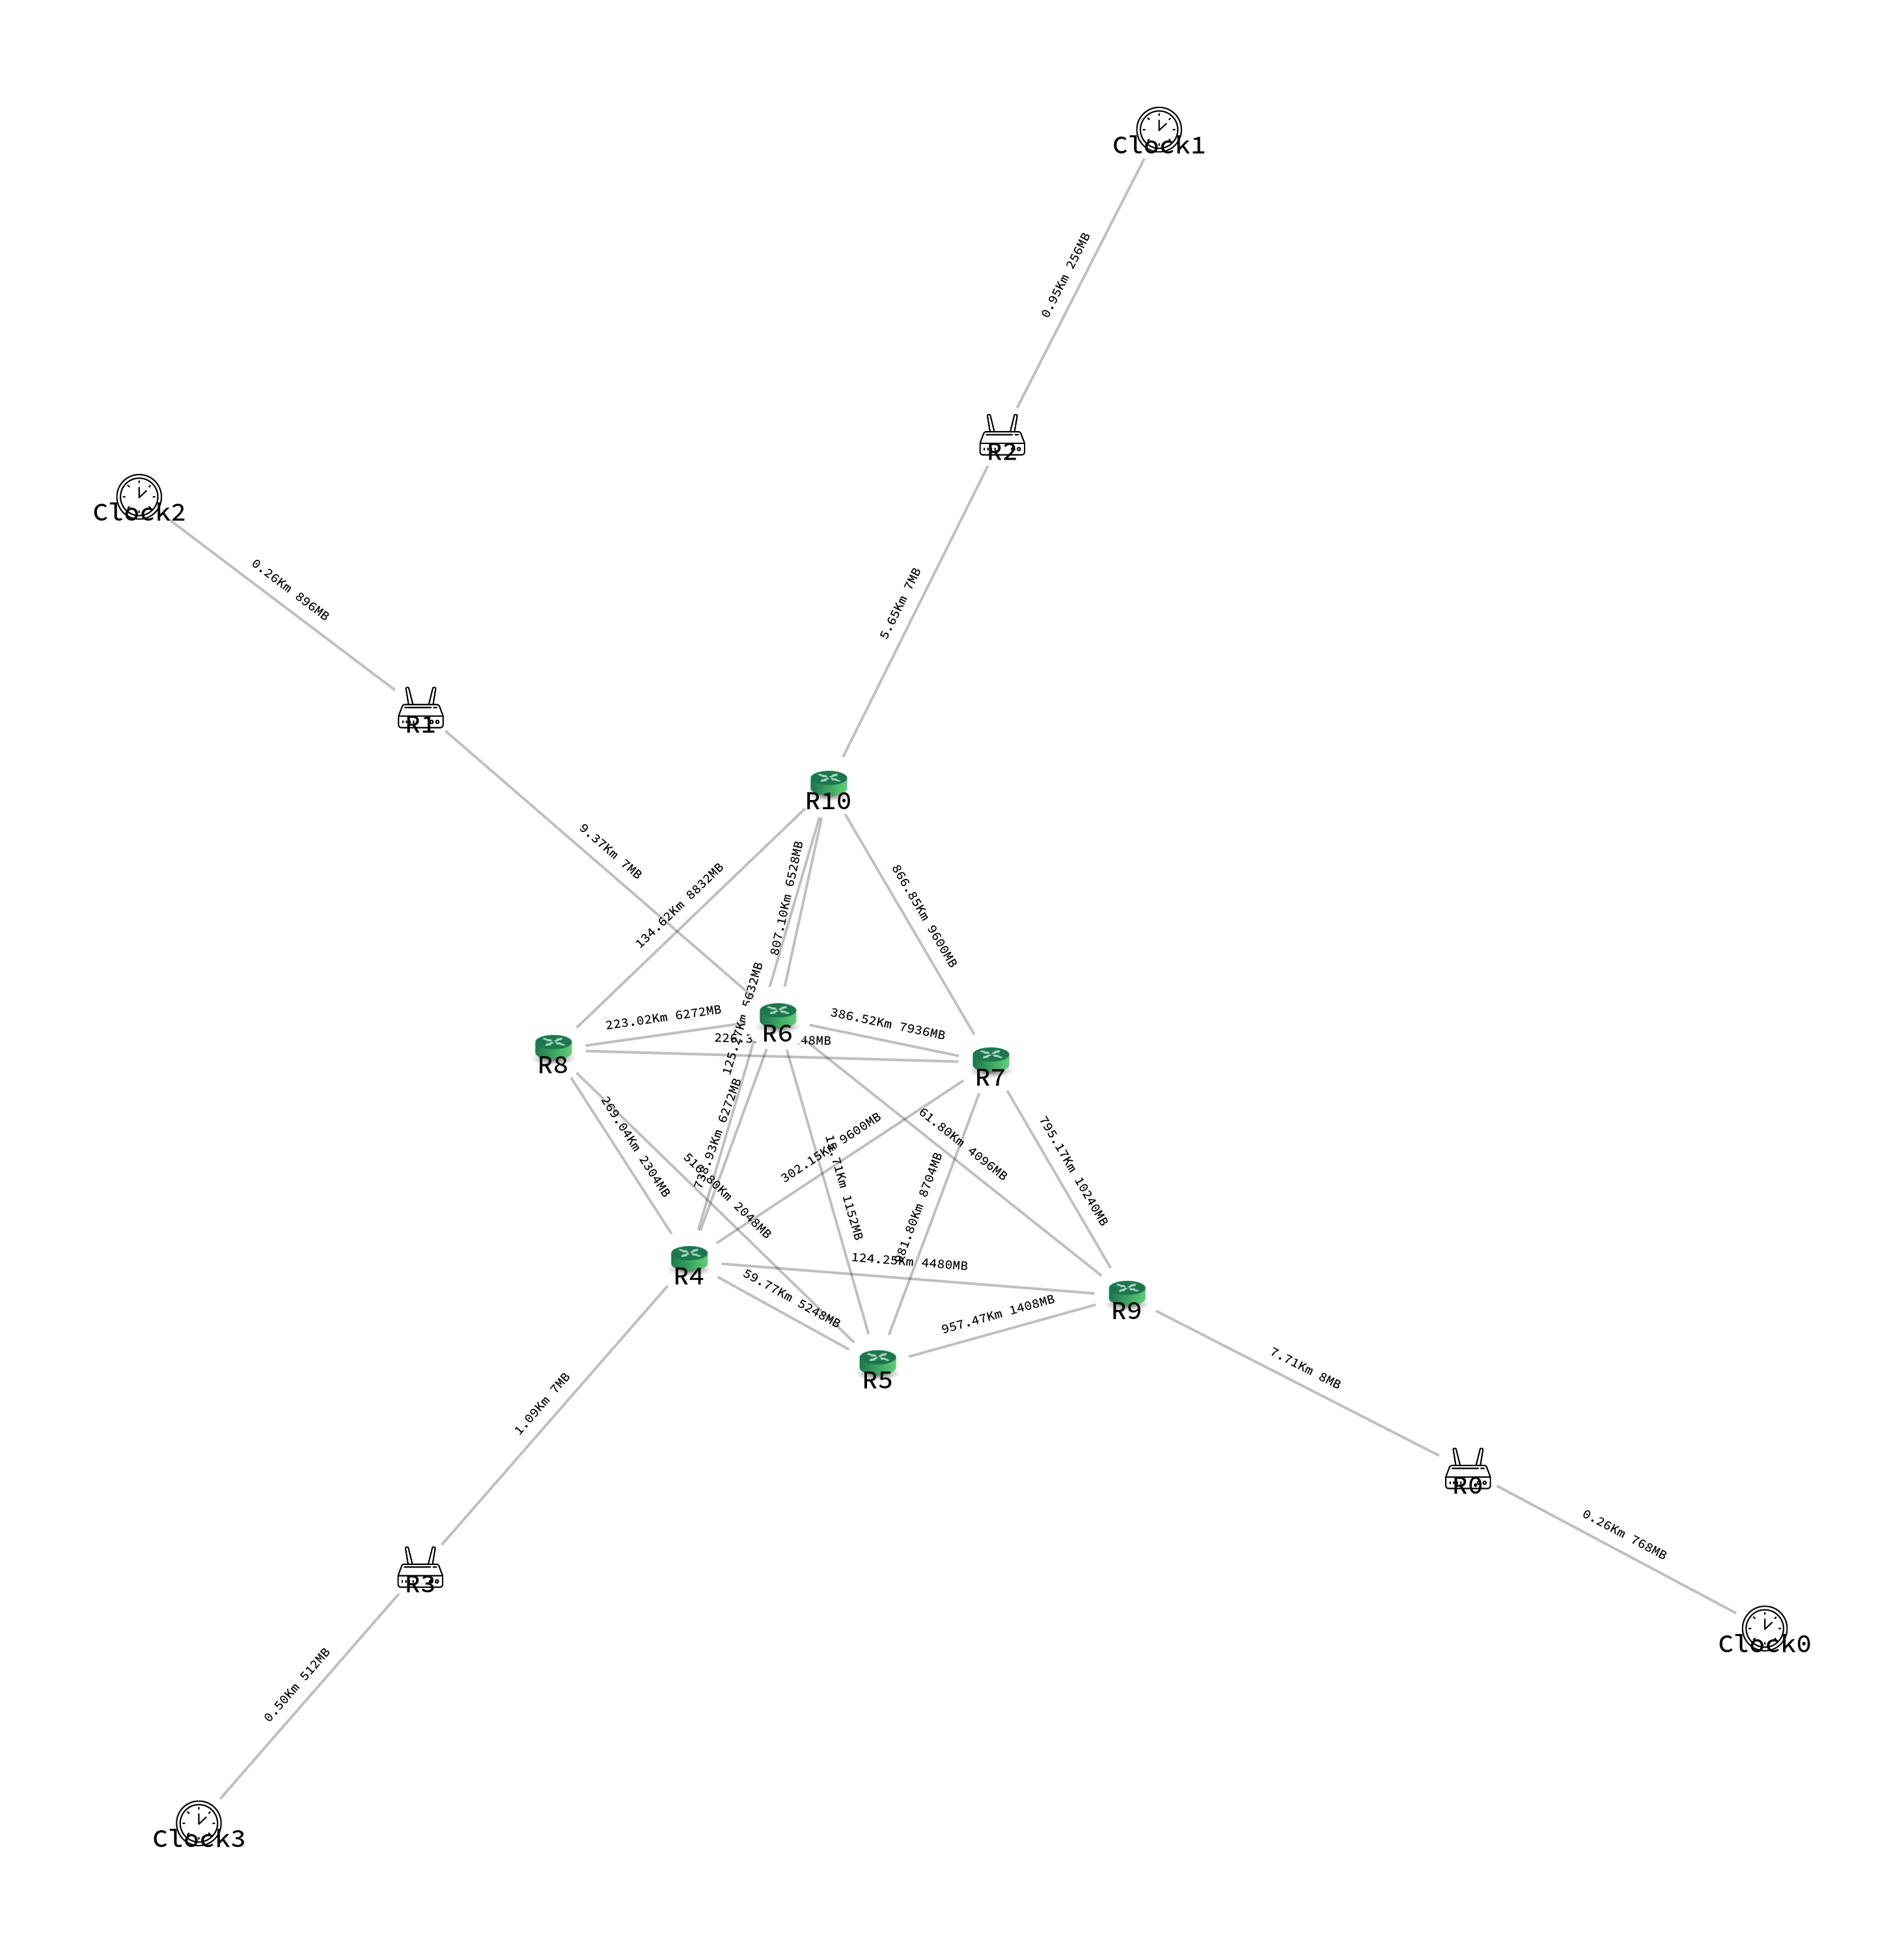

In [3]:
print_g_route()

In [4]:
stride = float(config.get('config', 'simulate_stride'))
true_time = 0.0
error_nodes_data = {}
clocks = get_clocks(nodes)
main_clock = get_main_clock(clocks)
print(f"main clock = {main_clock.show_name}")
slave_clocks = get_slave_clocks(clocks,main_clock)
error_nodes_data['true time'] = []
for clock in clocks:
    error_nodes_data[clock] = []

def set_error_nodes_data(error_nodes_data):
    error_nodes_data['true time'].append(true_time)
    for clock in clocks:
        error_nodes_data[clock].append(clock.time)

main clock = Clock3


In [5]:
remove_file(config.get('config', 'output_clocks_delay'),"*.csv")
remove_file(config.get('config', 'output_link_info'),"*.csv")
remove_file(config.get('config', 'output_visualization'),"*.png")
step = 0
while step < int(config.get('config', 'simulate_max_steps')):
    step+=1
    print(f'\nstep{step}---------------------------------------------------------------')
    print(f'          {format_time_units()}          {format_time_units()}')
    print(f'True Time {format_time(true_time)}\n')
    set_error_nodes_data(error_nodes_data)
    for clock in clocks:
        print(f'{clock.show_name}    {format_time(clock.time)}    Error:{format_time(clock.time - true_time)}')
        clock.time += stride+clockDeltaTime(step*stride)
    true_time += stride
    reset_all_links_delay(links,package_size)
    for slave_clock in slave_clocks:
        clear_all_route(g,routes,links)
        create_best_route(main_clock.name,slave_clock.name)
        set_default_properties(links,nodes)
        print_g_route(f"output/visualization/{step}_{main_clock.show_name} To {slave_clock.show_name}.png")
    save_all_links_delay(links,step)
    if step % 10 == 0:
        new_time = run_berkeley_algorithm(main_node=clock.show_name,step=step)
        print(f"Target Time :{new_time}")
        for clock in clocks:
            print(f"Correction of {clock.show_name}: {float(new_time)-clock.time}")
            clock.time = float(new_time)
        time.sleep(float(config.get('config', 'simulate_berkeley_wait_time')))
    time.sleep(float(config.get('config', 'simulate_normal_wait_time')))


step1---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 00:00:00 000 000 000 000

Clock2    00:00:00 000 000 000 000    Error:00:00:00 000 000 000 000
Clock3    00:00:00 000 000 000 000    Error:00:00:00 000 000 000 000
Clock0    00:00:00 000 000 000 000    Error:00:00:00 000 000 000 000
Clock1    00:00:00 000 000 000 000    Error:00:00:00 000 000 000 000

step2---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 00:16:40 000 000 000 000

Clock2    00:16:40 001 001 000 079    Error:00:00:00 001 001 000 079
Clock3    00:16:40 001 001 000 086    Error:00:00:00 001 001 000 086
Clock0    00:16:40 001 001 000 086    Error:00:00:00 001 001 000 086
Clock1    00:16:40 001 001 000 117    Error:00:00:00 001 001 000 117

step3---------------------------------------------------------------
          hh:mm:ss |ms |µs |


step19---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 05:00:00 000 000 000 000

Clock2    05:00:00 185 778 079 856    Error:00:00:00 185 778 079 856
Clock3    05:00:00 185 778 079 867    Error:00:00:00 185 778 079 867
Clock0    05:00:00 185 778 079 882    Error:00:00:00 185 778 079 881
Clock1    05:00:00 185 778 079 882    Error:00:00:00 185 778 079 881

step20---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 05:16:40 000 000 000 000

Clock2    05:16:40 205 139 079 946    Error:00:00:00 205 139 079 946
Clock3    05:16:40 205 139 079 980    Error:00:00:00 205 139 079 978
Clock0    05:16:40 205 139 079 997    Error:00:00:00 205 139 079 997
Clock1    05:16:40 205 139 079 975    Error:00:00:00 205 139 079 975

Berkeley Algorithm:
Target Time :20000.23932857009
Correction of Clock2: 0.013789490058115916
C


step37---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 10:00:00 000 000 000 000

Clock2    10:00:00 721 849 214 090    Error:00:00:00 721 849 214 089
Clock3    10:00:00 721 849 214 150    Error:00:00:00 721 849 214 147
Clock0    10:00:00 721 849 214 155    Error:00:00:00 721 849 214 154
Clock1    10:00:00 721 849 214 120    Error:00:00:00 721 849 214 118

step38---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 10:16:40 000 000 000 000

Clock2    10:16:40 760 218 214 185    Error:00:00:00 760 218 214 185
Clock3    10:16:40 760 218 214 200    Error:00:00:00 760 218 214 199
Clock0    10:16:40 760 218 214 260    Error:00:00:00 760 218 214 258
Clock1    10:16:40 760 218 214 240    Error:00:00:00 760 218 214 236

step39---------------------------------------------------------------
          hh:mm:ss |ms |µ


step55---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 15:00:00 000 000 000 000

Clock2    15:00:01 603 158 866 380    Error:00:00:01 603 158 866 382
Clock3    15:00:01 603 158 866 375    Error:00:00:01 603 158 866 375
Clock0    15:00:01 603 158 866 346    Error:00:00:01 603 158 866 346
Clock1    15:00:01 603 158 866 290    Error:00:00:01 603 158 866 288

step56---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 15:16:40 000 000 000 000

Clock2    15:16:41 661 183 866 476    Error:00:00:01 661 183 866 475
Clock3    15:16:41 661 183 866 470    Error:00:00:01 661 183 866 468
Clock0    15:16:41 661 183 866 454    Error:00:00:01 661 183 866 453
Clock1    15:16:41 661 183 866 370    Error:00:00:01 661 183 866 366

step57---------------------------------------------------------------
          hh:mm:ss |ms |µ


step73---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 20:00:00 000 000 000 000

Clock2    20:00:02 845 355 189 010    Error:00:00:02 845 355 189 012
Clock3    20:00:02 845 355 188 970    Error:00:00:02 845 355 188 968
Clock0    20:00:02 845 355 188 980    Error:00:00:02 845 355 188 983
Clock1    20:00:02 845 355 189 000    Error:00:00:02 845 355 188 997

step74---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 20:16:40 000 000 000 000

Clock2    20:16:42 923 684 189 110    Error:00:00:02 923 684 189 110
Clock3    20:16:42 923 684 189 100    Error:00:00:02 923 684 189 096
Clock0    20:16:42 923 684 189 080    Error:00:00:02 923 684 189 081
Clock1    20:16:42 923 684 189 130    Error:00:00:02 923 684 189 125

step75---------------------------------------------------------------
          hh:mm:ss |ms |µ


Berkeley Algorithm:
Target Time :90004.45866867385
Correction of Clock2: 0.013688930281205103
Correction of Clock3: 0.013688930295757018
Correction of Clock0: 0.013688930397620425
Correction of Clock1: 0.013688930324860848

step91---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 01:00:00 000 000 000 000

Clock2    01:00:04 458 668 673 850    Error:00:00:04 458 668 673 847
Clock3    01:00:04 458 668 673 850    Error:00:00:04 458 668 673 847
Clock0    01:00:04 458 668 673 850    Error:00:00:04 458 668 673 847
Clock1    01:00:04 458 668 673 850    Error:00:00:04 458 668 673 847

step92---------------------------------------------------------------
          hh:mm:ss |ms |µs |ns |ps          hh:mm:ss |ms |µs |ns |ps
True Time 01:16:40 000 000 000 000

Clock2    01:16:44 557 949 673 920    Error:00:00:04 557 949 673 922
Clock3    01:16:44 557 949 673 950    Error:00:00:04 557 949 673 951
Clock0    

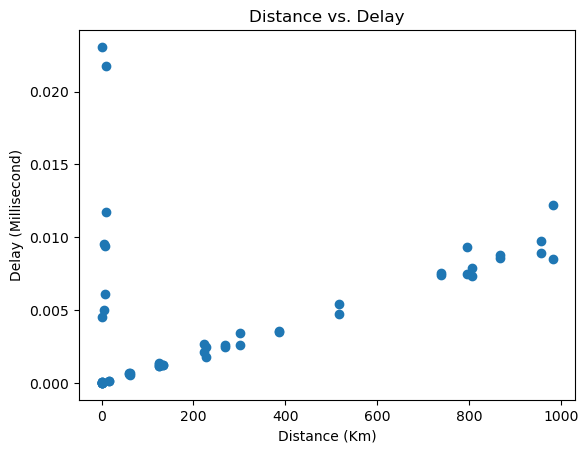

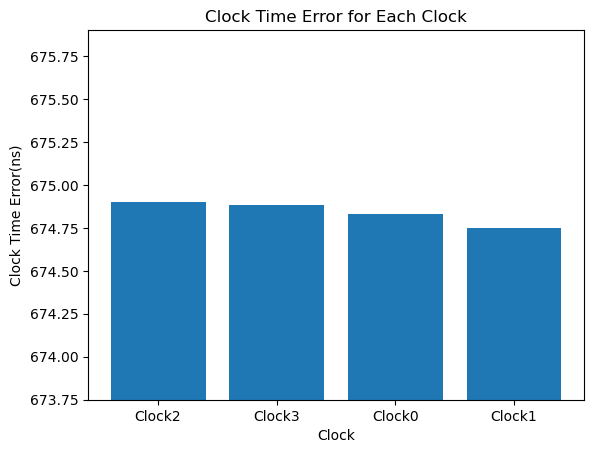

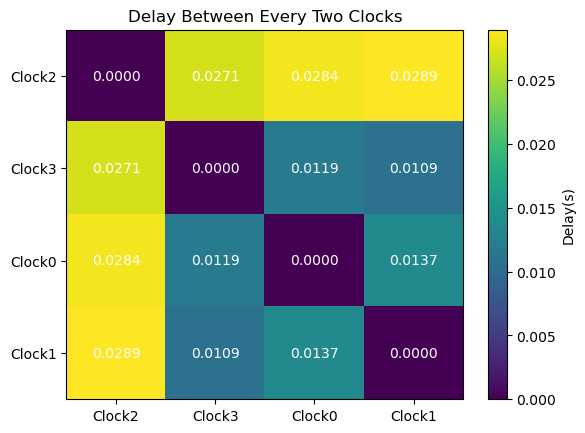

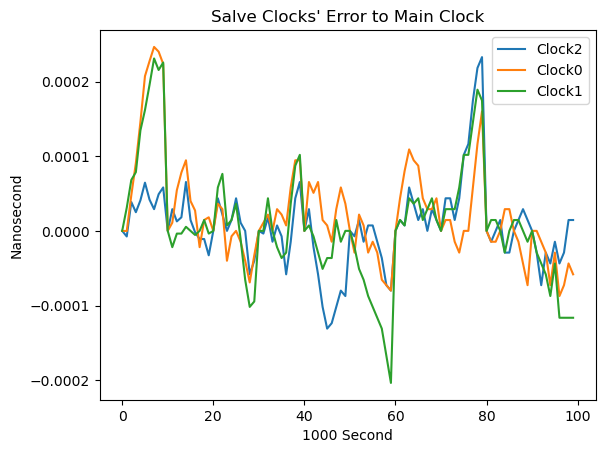

In [6]:
show_delay_plt(step)
show_clocks_time(step)
show_clocks_delay(step)
show_error_with_time(error_nodes_data,main_clock)